## Instructions
We will train Logistic Regression, which was the 2nd topic of Lecture 4.

Instead of the Iris dataset, we will use load the Digits dataset using "sklearn.datasets.load_digits()".
You'll use "X = digits["data"]" and "y = digits["target"]" to load images (=features) and their true labels.

Use the seed 0 everywhere.

1. Plot the first 100 images (with 10 images per row) as you did with MNIST. This dataset is  different from MNIST in sizes, number of examples, values, etc. You should modify the plotting function to accommodate the differences.

2. Randomly split the data into 80% training data and 20% testing data. Keep this split fixed.

We will try two different regularizers (l2 and l1) separately.

First use LogisticRegression(multi_class="multinomial",solver="lbfgs", penalty="l2", C=C, random_state=0, max_iter=1000)

What does this do? Comment on the choice of arguments above.
Here C are the value you are going to provide as the regularization weight, similar to HW4-1.

3. For each value of Cs = [1E-5,1E-4,1E-3,1E-2,1E-1,1E0]

(a) instantiate LogisticRegression
(b) measure 4-fold cross_validation error

Report the cross-validation errors. Which C value has the smallest validation error?

4. Now use the hyperparameter to retrain the model from scratch using all training data. Report the train and test error of this final model.

5. Repeat 3 with LogisticRegression(..., penalty="l1", C=C, random_state=0, max_iter=1000, solver='saga')

6. Repeat 4 with LogisticRegression(..., penalty="l1", C=C, random_state=0, max_iter=1000, solver='saga')

## 0. Loading Data and Libraries

In [1]:
# Importing libraries and packages
import sklearn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
# Load `digits` data from sklearn.datasets, split into data and target values
digits = load_digits()
X = digits["data"]
y = digits["target"]

In [3]:
X.shape
# 1797 entries, of 64 pixels each (image must be 8x8)

(1797, 64)

In [4]:
y.shape
# 1797 entries

(1797,)

## 1. Plotting Digits Data

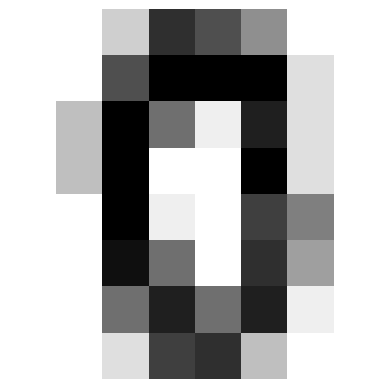

In [5]:
# Take some entry in X
some_digit = X[20]

# Reshape the vector for an 8x8 grid
some_digit_image = some_digit.reshape(8,8)

# Plot by mapping the entry of each pixel to grayscale value
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

In [6]:
# Check that label value matches picture
y[20]

0

In [7]:
# Plot function from lecture 3, modified for 8x8 images
def plot_digits(instances, images_per_row=10, **options):
    size = 8
    images_per_row = min(len(instances), images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size, images_per_row * size)
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

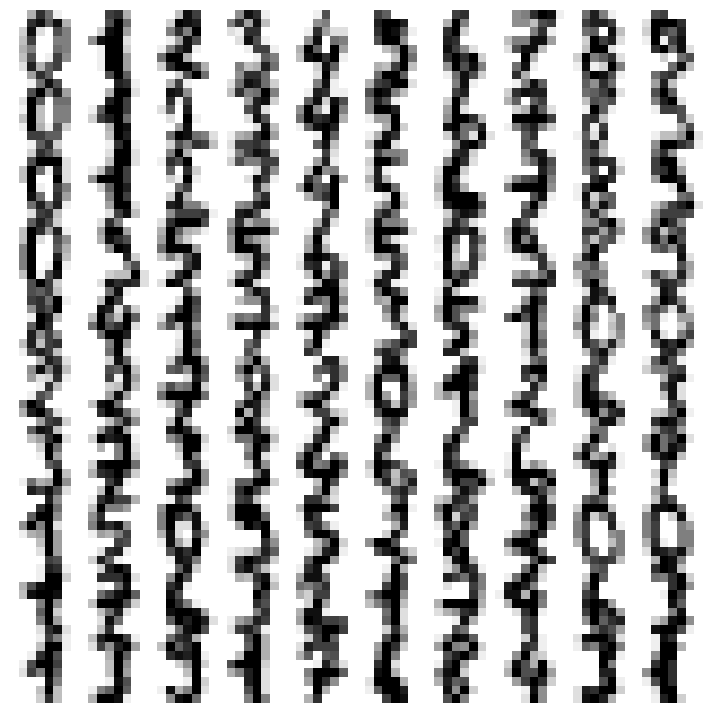

In [8]:
# Make a 10 x 10 grid
plt.figure(figsize=(9,9))
# Take first 100 data samples and plot
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
plt.show()

*Note that the resolution is lower than the MNIST image data, (8x8 image as opposed to a 28x28 image) - each number is harder to make out*

## 2. Splitting data into training and test sets

In [9]:
# Split data into train and test sets, 20% test size, and random_state is 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

## 2.5. Regression Model
`LogisticRegression(multi_class="multinomial",solver="lbfgs", penalty="l2", C=C, random_state=0, max_iter=1000)`
- `multi_class = "multinomial` means that the loss function that is being minimised is the multinomial loss over the entire distribution, even if the data is binary (classification)
- `solver = "lbfgs"` is the choice of solver algorithm. "lbfgs" stands for the Limited-memory Broyden-Fletcher-Goldfarb-Shanno algorithm, which is the default for `LogisticRegression` in sklearn. It's a kind of memory-efficient gradient descent using Newton's method, useful for data with an elongated shape.
- `penalty = "l2"` means that the regularization term is the $\ell_{2}$ norm (euclidean distance), or the square root of all components of each vector squared.
- `C = C` is the inverse of the regularization strength, which is the hyper-parameter we will optimize
- `random_state = 0` ensures that the data is shuffled the same across all different instantiations of the regressor
- `max_iter = 1000` is the maximum number of iterations taken for the solvers to converge to an approximation



## 3. Optimizing Hyperparameter

In [10]:
# List of options for C parameter from prompt
Cparams= [1E-5,1E-4,1E-3,1E-2,1E-1,1E0]

# Empty list for error results
resultlist = []

# Had to increase max_iterations to 10000, solver was not converging for any 1000 iterations
# Take kfold CV score, and take 1-score to get error for each option of C
for c in Cparams:
  logistic_regressor = LogisticRegression(multi_class="multinomial", solver="lbfgs", penalty="l2", C=c, random_state=0, max_iter=10000)
  kfold_scores = cross_val_score(logistic_regressor, X_train, y_train, cv = 4)
  kfold_errors = [1-s for s in kfold_scores]
  resultlist.append([c, kfold_errors, np.mean(kfold_errors)])

In [11]:
# Print the results for each C value
print(tabulate(resultlist, headers = ["C", "CV_ERRORS", "CV_MEAN"]))

     C  CV_ERRORS                                                                                CV_MEAN
------  -------------------------------------------------------------------------------------  ---------
1e-05   [0.16388888888888886, 0.1643454038997214, 0.15320334261838442, 0.14763231197771587]    0.157267
0.0001  [0.0888888888888889, 0.08635097493036215, 0.07520891364902504, 0.06128133704735372]    0.0779325
0.001   [0.050000000000000044, 0.05013927576601673, 0.05013927576601673, 0.03899721448467963]  0.0473189
0.01    [0.03888888888888886, 0.027855153203342642, 0.04178272980501396, 0.01949860724233987]  0.0320063
0.1     [0.033333333333333326, 0.04178272980501396, 0.04178272980501396, 0.02228412256267409]  0.0347957
1       [0.036111111111111094, 0.03899721448467963, 0.04178272980501396, 0.02506963788300831]  0.0354902


In [12]:
# Print the C value with the lowest mean CV error
errorlist = [e[2] for e in resultlist]
print("Best C:", resultlist[np.argmin(errorlist)][0])

Best C: 0.01


##4. Optimized Training

In [13]:
# Fit optimal regressor to all training data
opt_logistic_regressor = logistic_regressor = LogisticRegression(multi_class="multinomial", solver="lbfgs", penalty="l2", C=0.01, random_state=0, max_iter=10000)
opt_logistic_regressor.fit(X_train, y_train)

LogisticRegression(C=0.01, max_iter=10000, multi_class='multinomial',
                   random_state=0)

In [14]:
y_train_predict = opt_logistic_regressor.predict(X_train)
y_test_predict = opt_logistic_regressor.predict(X_test)
opt_logistic_test_error = mean_squared_error(y_test, y_test_predict)
opt_logistic_train_error = mean_squared_error(y_train, y_train_predict)

print("Test error: %.4f" %(opt_logistic_test_error))
print("Train error: %.4f" %(opt_logistic_train_error))

Test error: 1.0361
Train error: 0.1955


##5. Repeating Hyperparameter Search with 'saga' Solver

In [15]:
# List of options for C parameter from prompt
Cparams= [1E-5,1E-4,1E-3,1E-2,1E-1,1E0]

# Empty list for error results
resultlist = []

# Had to increase max_iterations to 10000, solver was not converging for any 1000 iterations
# Take kfold CV score, and take 1-score to get error for each option of C
for c in Cparams:
  logistic_regressor = LogisticRegression(multi_class="multinomial", penalty="l1", C=c, random_state=0, max_iter=10000, solver='saga')
  kfold_scores = cross_val_score(logistic_regressor, X_train, y_train, cv = 4)
  kfold_errors = [1-s for s in kfold_scores]
  resultlist.append([c, kfold_errors, np.mean(kfold_errors)])

In [16]:
# Print the results for each C value
print(tabulate(resultlist, headers = ["C", "CV_ERRORS", "CV_MEAN"]))

     C  CV_ERRORS                                                                               CV_MEAN
------  ------------------------------------------------------------------------------------  ---------
1e-05   [0.8944444444444445, 0.8941504178272981, 0.8969359331476323, 0.8941504178272981]      0.89492
0.0001  [0.8944444444444445, 0.8941504178272981, 0.8969359331476323, 0.8941504178272981]      0.89492
0.001   [0.8138888888888889, 0.7938718662952646, 0.8050139275766017, 0.8050139275766017]      0.804447
0.01    [0.07777777777777772, 0.0919220055710307, 0.07799442896935938, 0.058495821727019504]  0.0765475
0.1     [0.0444444444444444, 0.03064066852367686, 0.04178272980501396, 0.03064066852367686]   0.0368771
1       [0.047222222222222276, 0.03342618384401119, 0.0473537604456824, 0.03899721448467963]  0.0417498


In [17]:
# Print the C value with the lowest mean CV error
errorlist = [e[2] for e in resultlist]
print("Best C:", resultlist[np.argmin(errorlist)][0])

Best C: 0.1


In [18]:
# Fit optimal regressor to all training data
opt_logistic_regressor = logistic_regressor = LogisticRegression(multi_class="multinomial", penalty="l1", C=0.1, random_state=0, max_iter=1000, solver='saga')
opt_logistic_regressor.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000, multi_class='multinomial',
                   penalty='l1', random_state=0, solver='saga')

In [19]:
y_train_predict = opt_logistic_regressor.predict(X_train)
y_test_predict = opt_logistic_regressor.predict(X_test)
opt_logistic_test_error = mean_squared_error(y_test, y_test_predict)
opt_logistic_train_error = mean_squared_error(y_train, y_train_predict)

print("Test error: %.4f" %(opt_logistic_test_error))
print("Train error: %.4f" %(opt_logistic_train_error))

Test error: 1.0806
Train error: 0.2373
